In [3]:
import sys
print(sys.version)

3.6.5 (v3.6.5:f59c0932b4, Mar 28 2018, 05:52:31) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [4]:
import os
import json
import pandas as pd
import pandas_profiling
import numpy as np
from scipy import stats
import statsmodels.api as sm
from patsy import dmatrices
from matplotlib import pyplot as plt

In [5]:
%matplotlib inline

# Statistical analysis of feature computations results


## 1. Data importation and manipulation

In [6]:
def get_path_to_all_files(folder_name):
    """Recursively get all filepaths from a directory tree."""

    filepaths = []
    for dirname, dirnames, filenames in os.walk(folder_name):
        for filename in filenames:
            if '.DS_Store' not in filename:
                filepaths.append(os.path.join(dirname, filename))

    return filepaths

### 1.1 Data importation


In [7]:
results_folder = "/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_results"

In [8]:
files = get_path_to_all_files(results_folder)

#### 1.1.1 Force plate feature data

In [9]:
fp_files = [file for file in files if "Vicon" in file and "cop" not in file]
fp_files[1:5]

['/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_results/Sujet4/Session2/Vicon/7_features.json',
 '/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_results/Sujet4/Session2/Vicon/3_features.json',
 '/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_results/Sujet4/Session2/Vicon/11_features.json',
 '/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_results/Sujet4/Session2/Vicon/12_features.json']

#### 1.1.2 Wii Balance Board feature data


In [10]:
wbb_files = [file for file in files if "Vicon" not in file and "cop" not in file]
wbb_files[1:5]

['/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_results/Sujet4/Session2/BalanceBoard/7_features.json',
 '/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_results/Sujet4/Session2/BalanceBoard/3_features.json',
 '/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_results/Sujet4/Session2/BalanceBoard/11_features.json',
 '/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_results/Sujet4/Session2/BalanceBoard/12_features.json']

### 1.2 Data manipulation

In [11]:
def create_and_merge_dataframes(files):
    time_frames = []
    frequency_frames = []
    for filepath in files:
        with open(filepath) as json_data:
            features = json.load(json_data)
            time_features = features["time_features"]
            frequency_features = features["frequency_features"]
        time_frames.append(pd.DataFrame(time_features, index=[0]))
        frequency_frames.append(pd.DataFrame(frequency_features,index=[0]))
    
    time_features_df = pd.concat(time_frames, axis=0)
    frequency_features_df = pd.concat(frequency_frames, axis=0)
    
    df1 = time_features_df.reset_index().drop('index', 1)
    df2 = frequency_features_df.reset_index().drop('index', 1)
    
    return (df1,df2)

#### 1.2.1 WBB  features results merging

In [12]:
wbb_time,wbb_freq = create_and_merge_dataframes(wbb_files)

In [13]:
wbb_time.head()

,Mean distance,Mean distance-ML,Mean distance-AP,Rms distance,Rms distance-ML,Rms distance-AP,Path length,Path length-ML,Path length-AP,Mean velocity,...,Range-ML,Range-AP,95% confidence circle area,95% confidence elipse area,Sway area,Mean frequency,Mean frequency-ML,Mean frequency-AP,Fractal dimension-CC,Fractal dimension-CE
0,5.843348,4.131871,6.218048,7.214333,5.101304,7.814486,1099.415697,781.024640,626.715616,13.528440,...,28.651585,37.730914,107.268782,NaN,38.736545,0.368473,0.411177,0.219244,1.672061,NaN
1,3.104098,2.194929,2.572604,3.802604,2.688847,3.156788,548.904033,388.881113,307.634765,6.762650,...,11.387031,14.047305,30.270577,NaN,7.993092,0.346738,0.385871,0.260440,1.656980,NaN
2,2.478770,1.752755,3.223319,2.964428,2.096167,4.463437,518.576679,381.819255,275.922373,6.391607,...,8.844580,19.878978,19.302885,NaN,8.517270,0.410387,0.474634,0.186512,1.698888,NaN
3,0.702153,0.496497,0.347621,0.900663,0.636865,0.421707,585.635999,449.554856,286.742003,7.247970,...,4.300508,2.216708,1.548866,NaN,1.399022,1.642875,1.980976,1.804673,2.145555,NaN
4,1.241606,0.877948,0.313170,1.422275,1.005700,0.393506,587.247414,471.905056,259.253873,7.235051,...,4.658184,2.038864,4.843032,NaN,1.788124,0.927423,1.170662,1.802980,1.936202,NaN


In [14]:
wbb_freq.head()

,Total power-RD,Total power-ML,Total power-AP,Peak frequency-RD,Peak frequency-ML,Peak frequency-AP,50% power frequency-RD,50% power frequency-ML,50% power frequency-AP,80% power frequency-RD,80% power frequency-ML,80% power frequency-AP
0,0.237235,0.124648,0.088469,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0
1,0.043227,0.022061,0.013919,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0
2,0.040275,0.020803,0.011520,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0
3,0.048282,0.030986,0.012113,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0
4,0.059509,0.031745,0.010152,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0


#### 1.2.2 FP  features results merging

In [15]:
fp_time,fp_freq = create_and_merge_dataframes(fp_files)

In [16]:
fp_time.head()

,Mean distance,Mean distance-ML,Mean distance-AP,Rms distance,Rms distance-ML,Rms distance-AP,Path length,Path length-ML,Path length-AP,Mean velocity,...,Range-ML,Range-AP,95% confidence circle area,95% confidence elipse area,Sway area,Mean frequency,Mean frequency-ML,Mean frequency-AP,Fractal dimension-CC,Fractal dimension-CE
0,8.614984,6.091714,4.361884,10.870357,7.686503,5.484879,1045.501929,639.115005,705.788361,38.866243,...,38.525526,32.599106,233.162584,NaN,109.095324,0.718023,0.689465,1.063342,1.673681,NaN
1,3.798908,2.686234,2.768911,4.644600,3.284228,3.297195,199.092823,162.988779,86.983621,7.252926,...,14.822569,14.165371,45.338526,NaN,10.806992,0.303861,0.390748,0.202307,1.469631,NaN
2,6.473228,4.577263,1.986782,8.296879,5.866779,2.376811,169.825125,140.785759,68.860523,6.137518,...,27.698238,10.659827,131.641155,NaN,8.035512,0.150901,0.196503,0.221430,1.336281,NaN
3,0.589417,0.416780,0.596368,0.717433,0.507302,0.788091,85.553691,39.582420,66.404771,3.091930,...,2.619614,9.064725,1.091426,NaN,0.888747,0.834886,0.606752,0.711379,1.720893,NaN
4,0.436363,0.308555,1.019477,0.539198,0.381270,1.147647,90.988324,42.466961,71.406307,3.253068,...,1.850617,4.463638,0.598200,NaN,1.063025,1.186493,0.869862,0.442682,1.830981,NaN


In [17]:
fp_freq.head()

,Total power-RD,Total power-ML,Total power-AP,Peak frequency-RD,Peak frequency-ML,Peak frequency-AP,50% power frequency-RD,50% power frequency-ML,50% power frequency-AP,80% power frequency-RD,80% power frequency-ML,80% power frequency-AP
0,1.402304,0.768567,1.131497,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0
1,0.104828,0.053717,0.014431,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0
2,0.073012,0.037139,0.008329,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005709,0.002946,0.013601,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0
4,0.006450,0.003687,0.010739,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Statistical analysis

### 2.1 General descriptive statistics HTML reports 

In [18]:
outputfile = "/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/notebooks/results/wbb_data_time_domain_report.html"
df_profile = pandas_profiling.ProfileReport(wbb_time, bins=50)
df_profile.to_file(outputfile=outputfile)

### 2.2 Features mean value and standard deviation 

In [19]:
wbb_time_mean_df = pd.DataFrame(wbb_time.mean(), columns = ["WBB mean"])
wbb_time_std_df = pd.DataFrame(wbb_time.std(), columns = ["WBB std"])

In [20]:
wbb_freq_mean_df = pd.DataFrame(wbb_freq.mean(), columns = ["WBB mean"])
wbb_freq_std_df = pd.DataFrame(wbb_freq.std(), columns = ["WBB std"])

In [21]:
fp_time_mean_df = pd.DataFrame(fp_time.mean(), columns = ["FP mean"])
fp_time_std_df = pd.DataFrame(fp_time.std(), columns = ["FP std"])

In [22]:
fp_freq_mean_df = pd.DataFrame(fp_freq.mean(), columns = ["FP mean"])
fp_freq_std_df = pd.DataFrame(fp_freq.std(), columns = ["FP std"])

In [23]:
time_domain_results = pd.concat([wbb_time_mean_df, wbb_time_std_df, fp_time_mean_df, fp_time_std_df], axis = 1)

In [24]:
time_domain_results

,WBB mean,WBB std,FP mean,FP std
Mean distance,13.601006,32.421941,6.533142,4.826120
Mean distance-ML,9.617364,22.925774,4.619629,3.412582
Mean distance-AP,5.201632,11.292203,9.086450,21.441943
Rms distance,18.059624,50.172681,8.794769,11.596020
Rms distance-ML,12.770082,35.477443,6.218841,8.199624
Rms distance-AP,32.724502,596.140935,12.329731,44.682165
Path length,37636.707890,807368.341682,2785.298497,45826.583710
Path length-ML,2900.579772,33128.935280,782.167760,8052.367619
Path length-AP,36604.040858,806711.870213,2526.759943,45118.973526
Mean velocity,502.509697,10812.783801,97.110404,1597.560522


### 2.3 Pearson's correlation coefficient and regression lines equations 


In [25]:
coeffs = fp_time.corrwith(wbb_time)


In [26]:
fp_time_cut = fp_time[:wbb_time.shape[0]]
len(fp_time_cut.columns)

23

In [27]:
def plot_correlation(df1,df2,name="time_domain"):
    columns = df1.columns
    fig, axs = plt.subplots(8,3,figsize=(20,30),facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5)
    axs[-1, -1].axis('off')
    for ax, column in zip(axs.ravel(), columns):
        x = df1[column]
        y = df2[column]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        ax.plot(x, y, '.', label='original data')
        ax.plot(x, intercept + slope*x, 'black', label='fitted line', linewidth=0.3)
        ax.set_xlabel('Balance Board')
        ax.set_ylabel('Force plate')
        ax.set_title(column, weight = 600)
        r_squared = round(r_value**2,4)
        ax.text(0.9, 0.5, "R\u00b2={}".format(r_squared),fontsize=9, horizontalalignment='center',
             verticalalignment='center',transform=ax.transAxes)
        #ax.legend()
    plt.savefig("results/{}_correlation_plots.png".format(name), bbox_inches='tight')


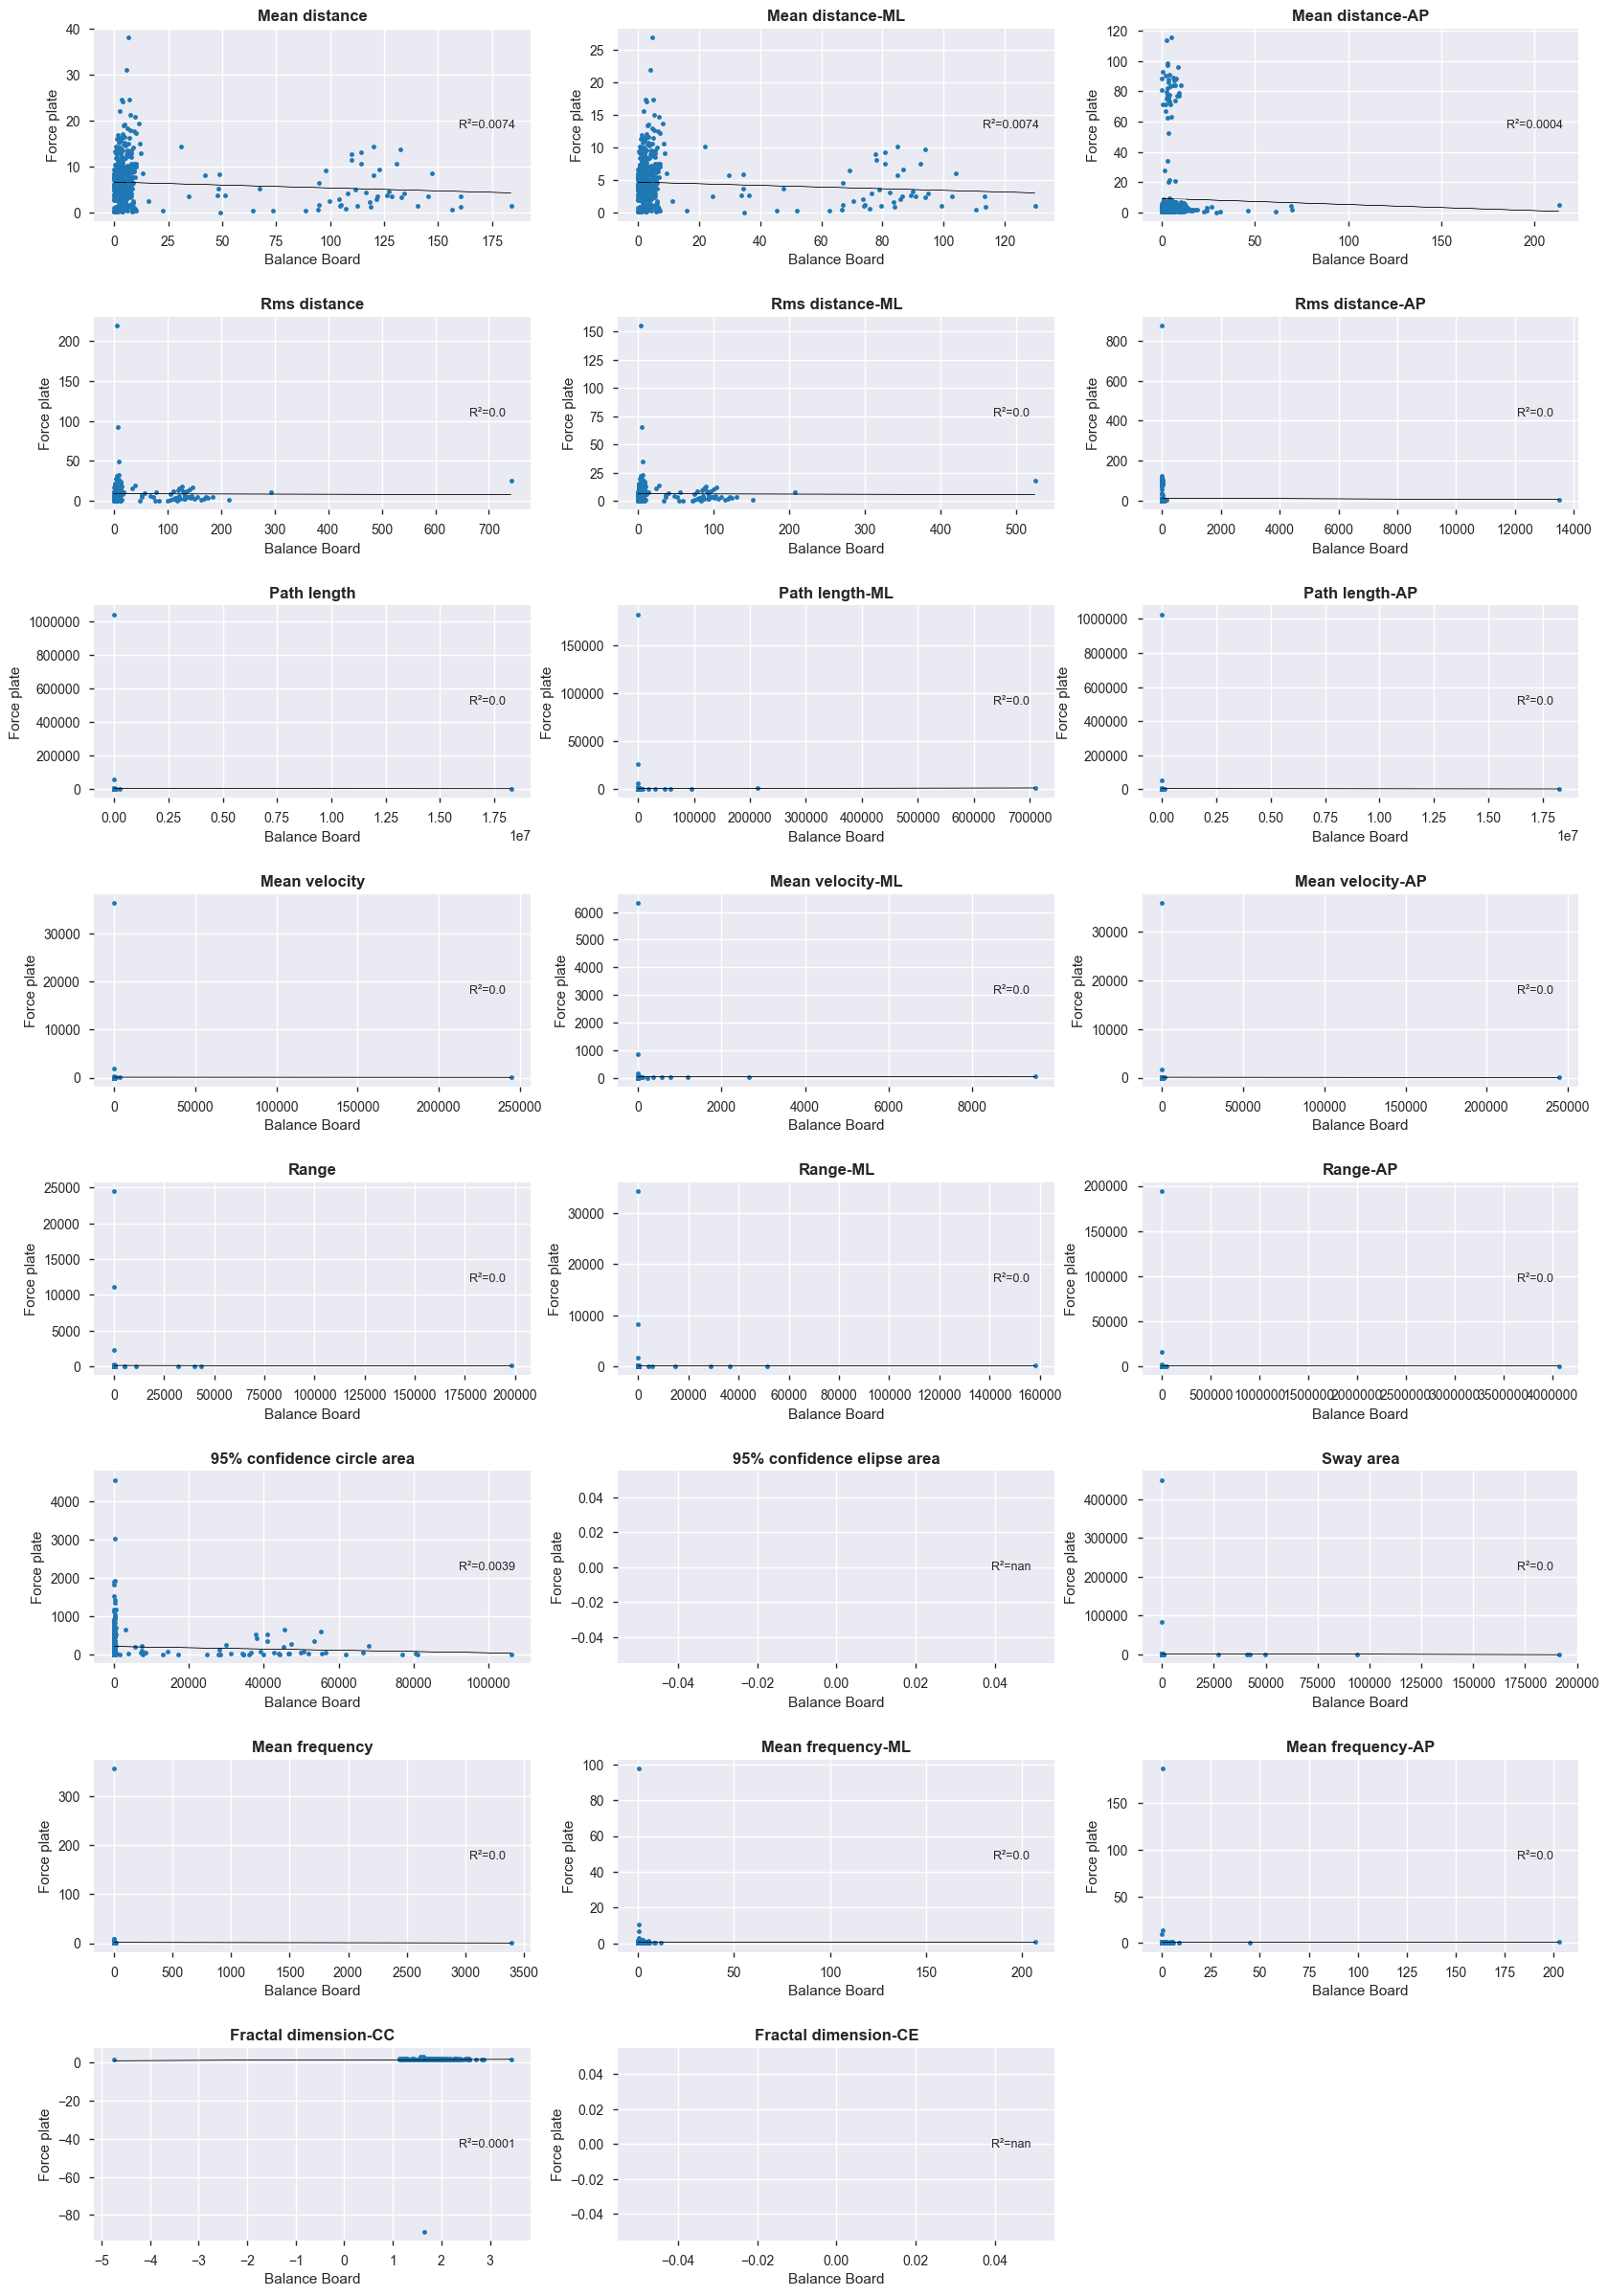

In [28]:
plot_correlation(wbb_time, fp_time_cut)

### 2.4 Two-tailed paired-sample statistical test



### 2.5 Intraclass correlation coefficient (ICC) 



### 2.6 Bland and Altman plots + LOA (limit of agreement)

In [63]:
def bland_altman_plot(df1, df2, name="time_domain"):
    columns = df1.columns
    fig, axs = plt.subplots(8,3,figsize=(20,30),facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5)
    axs[-1, -1].axis('off')
    for ax, column in zip(axs.ravel(), columns):
        x = df1[column]
        y = df2[column]
        
        data1 = np.asarray(x)
        data2 = np.asarray(y)
        mean = np.mean([x, y], axis=0)
        diff = x - y               
        md = np.mean(diff)               
        sd = np.std(diff, axis=0)

        ax.scatter(mean, diff, marker='.',s=100, color = "gray")
        ax.axhline(md,color='tomato', linestyle='--')
        ax.axhline(md + 2*sd, color='teal', linestyle='--')
        ax.axhline(md - 2*sd, color='teal', linestyle='--')
        ax.set_xlabel('Mean of the two systems')
        ax.set_ylabel('Mean of the difference')
        ax.set_title(column, weight = 600)
        
        #ax.legend()
    plt.savefig("results/{}_bland_altman_plots.png".format(name), bbox_inches='tight')

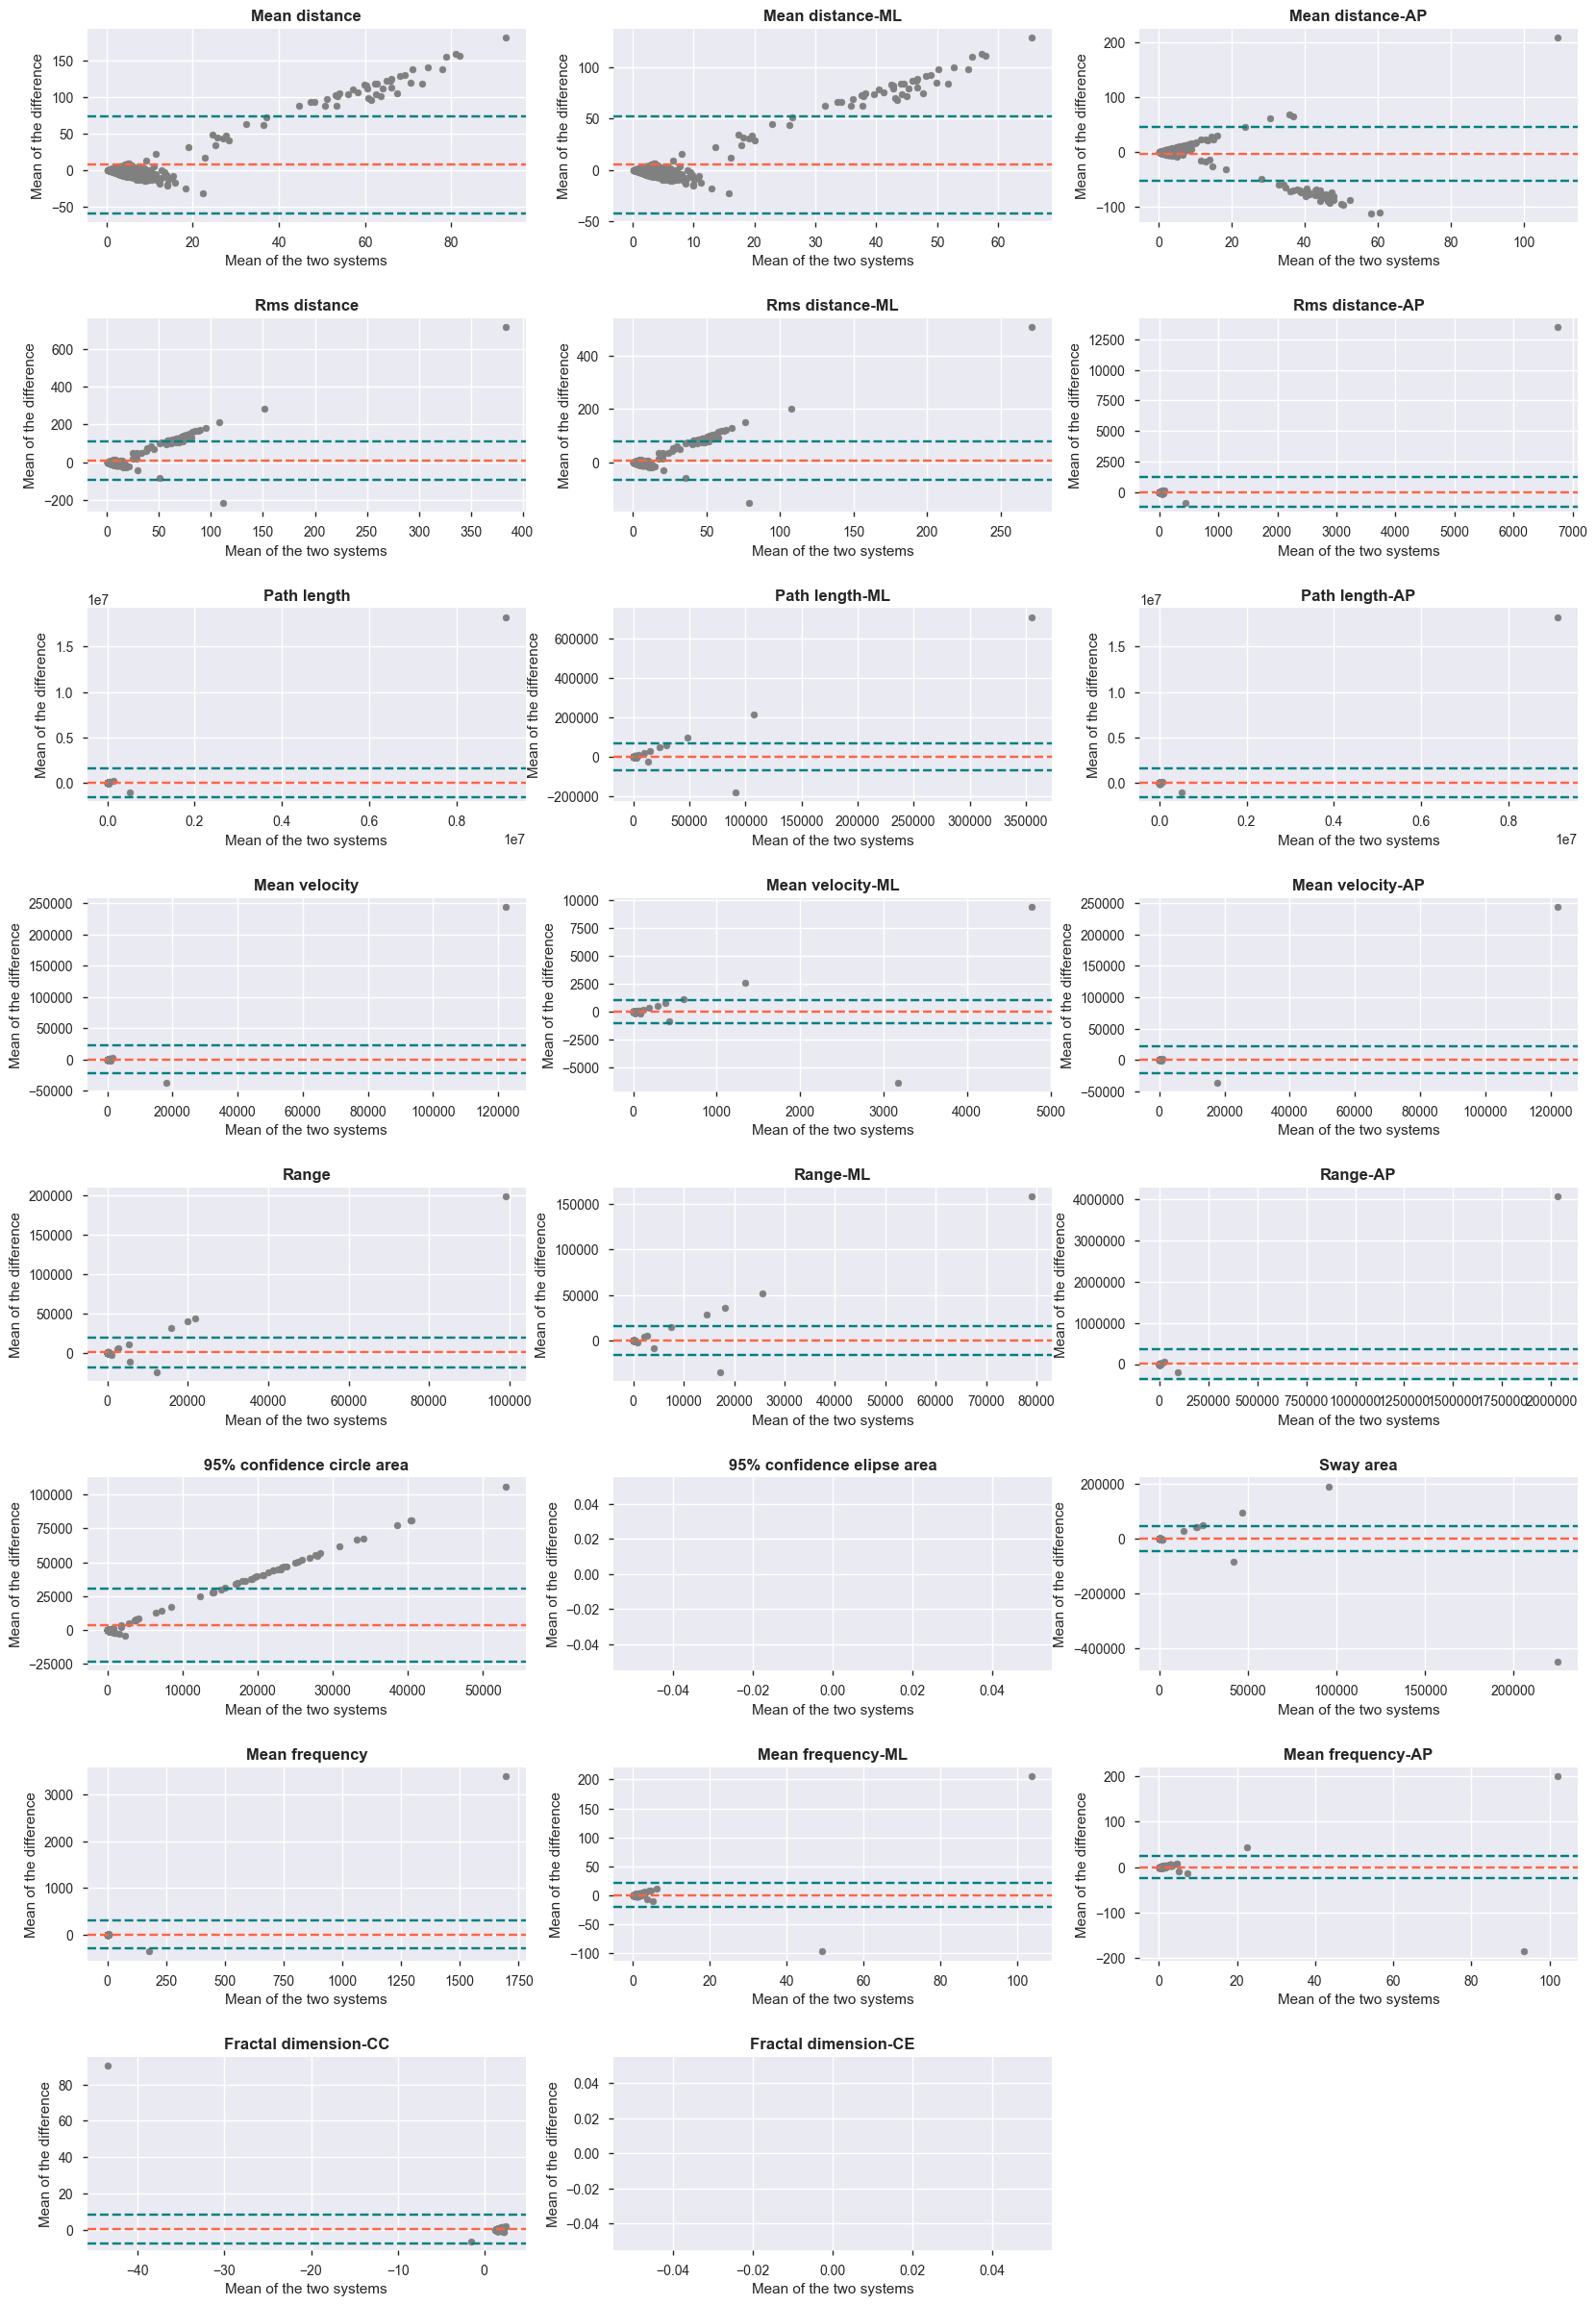

In [64]:
bland_altman_plot(wbb_time, fp_time_cut)

In [73]:

a = ["test","another"]
b = "another"

d = dict.fromkeys(a, 0)
d["test"][]

0